# Project: Simulating Tesla (TSLA) Stock Price for the Next 100 Days
### Overview:
- In this project, we will predict possible future stock prices of Tesla (TSLA) using Monte Carlo Simulations and the Geometric Brownian Motion (GBM) model.

# Why Is This Important?
- Financial analysts & traders use simulations to estimate risk and returns.
- Monte Carlo simulations help model uncertainty and randomness.
- Understanding stock price behavior can aid in making informed investment decisions.

## Step 1: Install & Import Dependencies

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Step 2: Fetch Historical TSLA Data
### Why?
We need real-world data to compute:
- Historical mean return (μ)
- Historical volatility (σ)

Fetch the last one year of Tesla stock prices:

In [5]:
# Download Tesla (TSLA) stock data for the past year
tsla = yf.download("TSLA", start="2024-03-11", end="2025-03-12")

# Display the first few rows
tsla.head()


*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-03-11,177.770004,182.869995,174.800003,175.449997,85391500
2024-03-12,177.539993,179.429993,172.410004,177.770004,87391700
2024-03-13,169.479996,176.050003,169.149994,173.050003,106524500
2024-03-14,162.500000,171.169998,160.509995,167.770004,126325700
2024-03-15,163.570007,165.179993,160.759995,163.160004,96971900


This fetches a DataFrame with columns like Open, High, Low, Close, Volume, and Adjusted Close.

- We will use the 'Close' price. 'Close' represents the raw market closing price.

## Step 3: Compute Returns and Volatility
### Why?
Stock price follows a random walk with drift, so we compute:

Daily returns = (𝑃𝑡 − 𝑃𝑡−1) / P𝑡−1

Average return (μ) = Mean of daily returns

Volatility (σ) = Standard deviation of daily returns

In [6]:
# Use 'Close' instead of 'Adj Close'
tsla['Returns'] = tsla['Close'].pct_change()

# Compute mean return and volatility
mu = tsla['Returns'].mean()
sigma = tsla['Returns'].std()

# Display values
print(f"Mean Daily Return (μ): {mu:.6f}")
print(f"Volatility (σ): {sigma:.6f}")

Mean Daily Return (μ): 0.001917
Volatility (σ): 0.042274


What Do These Values Mean?

Mean Return (μ): If μ > 0, TSLA has a long-term upward trend; if μ < 0, it has a downward trend.

Volatility (σ): High values mean more price swings (riskier stock).

## Step 4: Visualizing Historical Stock Prices

### Why?

A plot helps us observe trends and volatility before running simulations.

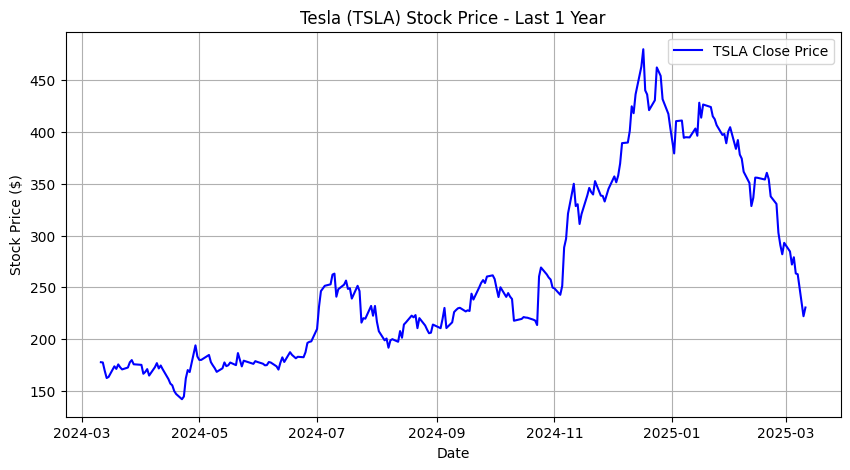

In [7]:
# Plot historical stock price
plt.figure(figsize=(10,5))
plt.plot(tsla['Close'], label="TSLA Close Price", color="blue")
plt.title("Tesla (TSLA) Stock Price - Last 1 Year")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid()
plt.show()

## Step 5: Implement Monte Carlo Simulation

### Understanding the Model:

We use the Geometric Brownian Motion (GBM) equation:

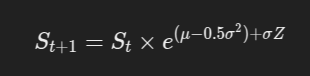

where:

𝑆𝑡 = Stock price at time

μ = Mean return (drift)

σ = Volatility (random fluctuation)

Z = Random number from a standard normal distribution (capturing randomness)

Simulating 10,000 Future Paths

We simulate 10,000 different future stock price trajectories over 100 days.

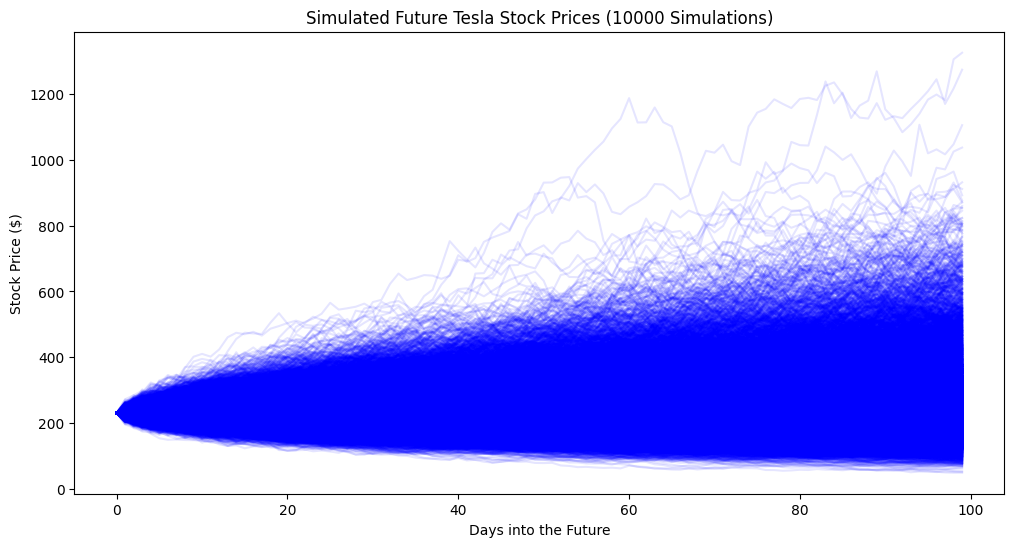

In [8]:
# Parameters for simulation
T = 100  # Number of days into the future
N = 10000  # Number of simulations
S0 = tsla['Close'].iloc[-1]  # Last observed stock price

# Create an empty matrix to store simulations
simulations = np.zeros((T, N))
simulations[0] = S0  # First row is the last known stock price

# Run Monte Carlo Simulations
for t in range(1, T):
    Z = np.random.normal(0, 1, N)  # Generate random noise
    simulations[t] = simulations[t - 1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * Z)

# Plot simulation results
plt.figure(figsize=(12,6))
plt.plot(simulations, alpha=0.1, color='blue')  # Plot many paths with transparency
plt.title("Simulated Future Tesla Stock Prices (10000 Simulations)")
plt.xlabel("Days into the Future")
plt.ylabel("Stock Price ($)")
plt.show()

### What Is Happening Here?

We simulate 10000 different price paths based on past trends.

Each line represents one possible future scenario for Tesla’s price.

The spread of paths reflects uncertainty—wider spread = higher volatility.



## Step 6: Statistical Analysis & Risk Assessment

After simulations, we analyze:

- Expected mean stock price
- Percentiles (best/worst-case scenarios)
- Probability of price drops (risk assessment)

In [9]:
# Compute final price distribution (price on day 100)
final_prices = simulations[-1, :]

# Compute key statistics
mean_price = np.mean(final_prices)
percentiles = np.percentile(final_prices, [5, 25, 50, 75, 95])

print(f"Mean estimated price after 100 days: ${mean_price:.2f}")
print(f"5th percentile (worst case): ${percentiles[0]:.2f}")
print(f"50th percentile (median case): ${percentiles[2]:.2f}")
print(f"95th percentile (best case): ${percentiles[4]:.2f}")

Mean estimated price after 100 days: $276.46
5th percentile (worst case): $126.31
50th percentile (median case): $254.39
95th percentile (best case): $502.03


###  Interpreting the Results
 - Mean price: The most likely average stock price in 100 days.
 - 5th percentile: Worst-case scenario (only 5% chance TSLA falls below this).
 - 95th percentile: Best-case scenario (only 5% chance TSLA goes above this).
### Risk Assessment:
 - If the 5th percentile is lower than today’s price, the stock might be risky for short-term investors.


## Step 7: Interactive Scenario Testing
 - What if TSLA becomes more volatile? Let’s test different volatility levels:

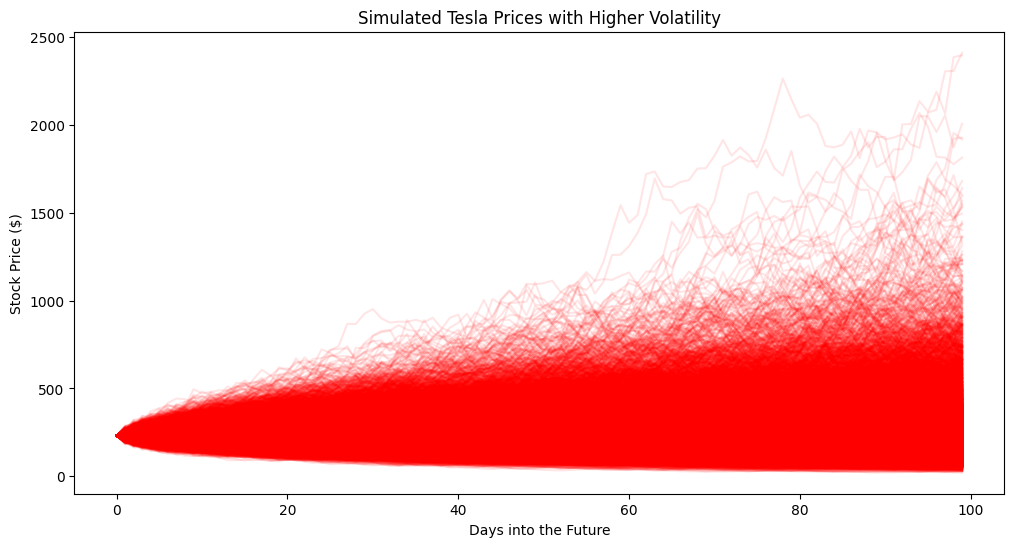

In [10]:
sigma_test = sigma * 1.5  # Increase volatility by 50%
simulations_high_vol = np.zeros((T, N))
simulations_high_vol[0] = S0

for t in range(1, T):
    Z = np.random.normal(0, 1, N)
    simulations_high_vol[t] = simulations_high_vol[t - 1] * np.exp((mu - 0.5 * sigma_test ** 2) + sigma_test * Z)

plt.figure(figsize=(12,6))
plt.plot(simulations_high_vol, alpha=0.1, color='red')
plt.title("Simulated Tesla Prices with Higher Volatility")
plt.xlabel("Days into the Future")
plt.ylabel("Stock Price ($)")
plt.show()

### Want to extend this further?
- Try different stocks (AAPL, NVDA).
- Add external factors (news events, earnings reports).
- Build a web dashboard with Flask/Streamlit.